In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('https://raw.githubusercontent.com/MananMishra-7/INSE6210/main/supply_chain_data.csv')
X.head(10)
X = X.rename(columns={'Lead times': 'Business lead time', 'Lead time':'Supplier lead time', 'Costs': 'Transportation costs'})
X.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Business lead time', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Supplier lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Routes',
       'Transportation costs'],
      dtype='object')

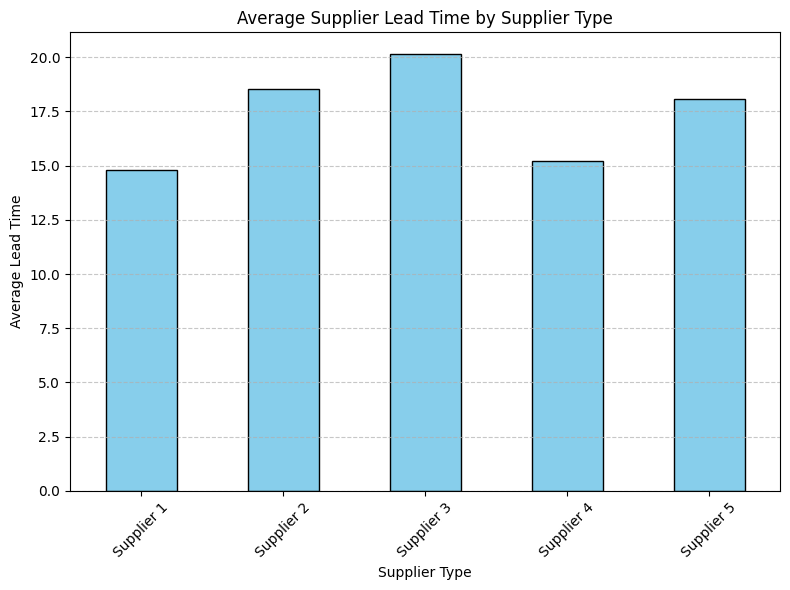

In [3]:
avg_lead_time = X.groupby('Supplier name')['Supplier lead time'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_lead_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Supplier Lead Time by Supplier Type')
plt.xlabel('Supplier Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


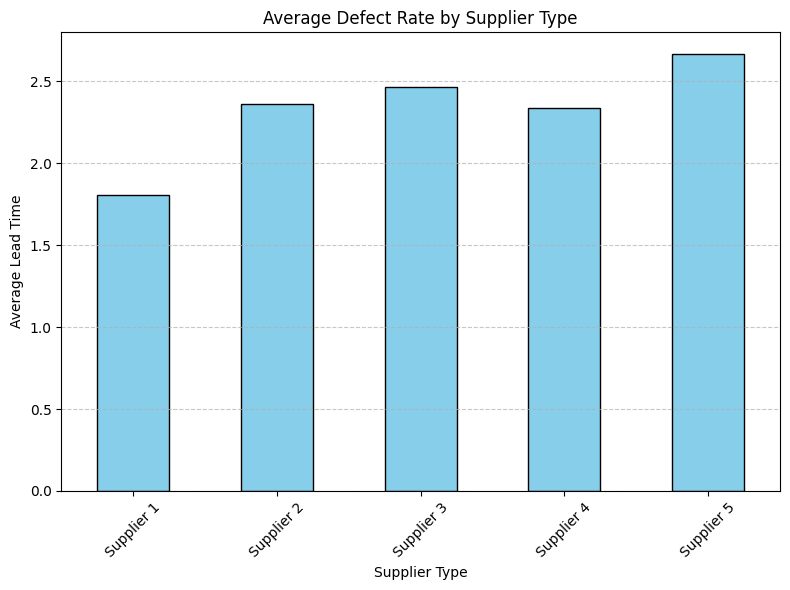

In [4]:
avg_lead_time = X.groupby('Supplier name')['Defect rates'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_lead_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Supplier Type')
plt.xlabel('Supplier Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


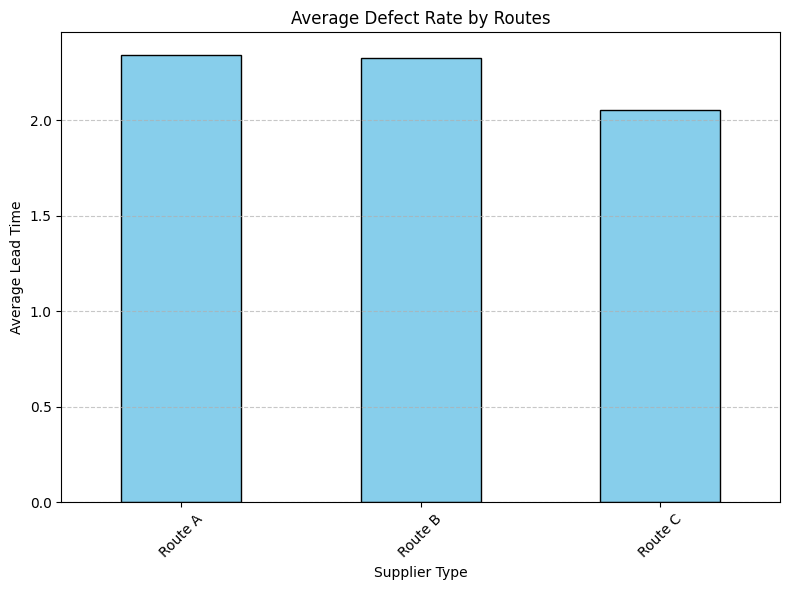

In [5]:
avg_lead_time = X.groupby('Routes')['Defect rates'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_lead_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Routes')
plt.xlabel('Supplier Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


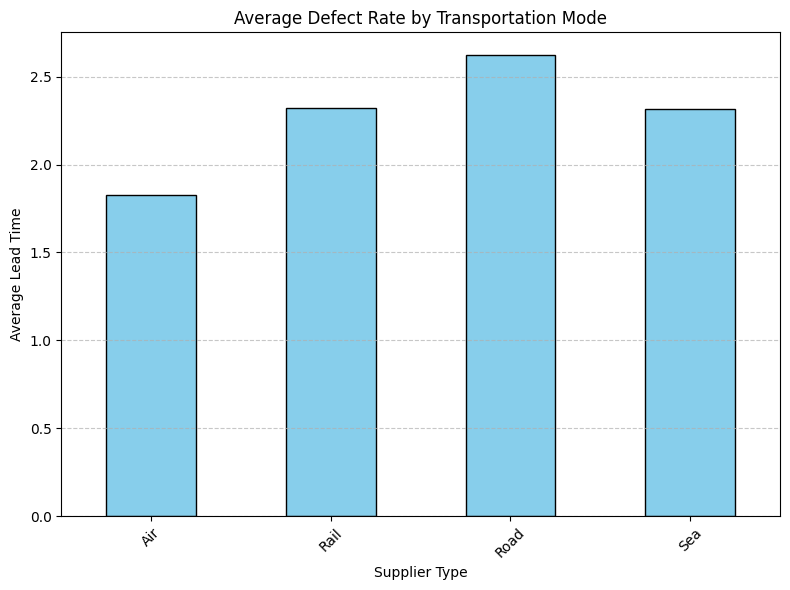

In [6]:
avg_lead_time = X.groupby('Transportation modes')['Defect rates'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_lead_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Transportation Mode')
plt.xlabel('Supplier Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


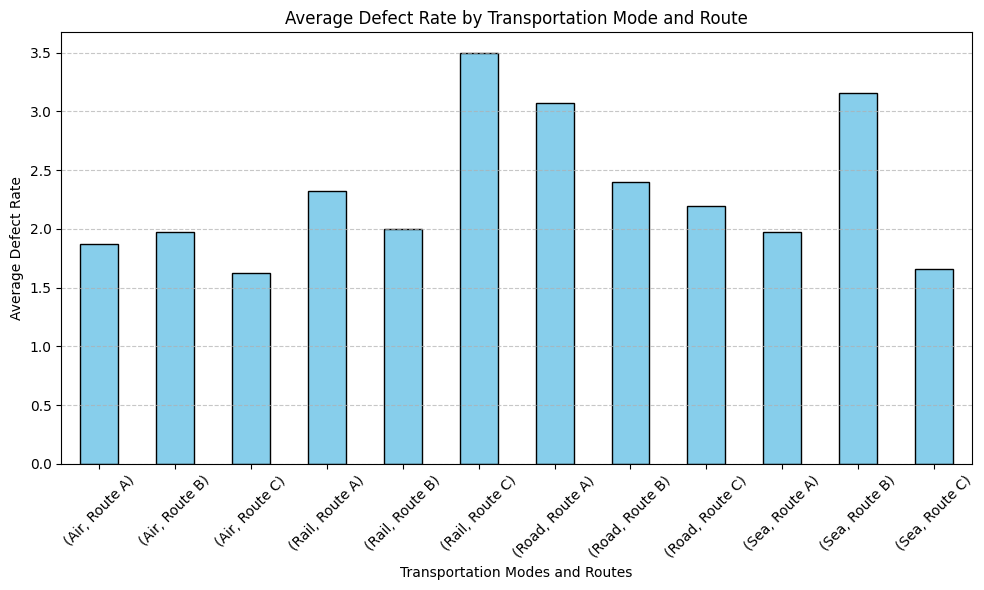

In [7]:
avg_defect_rate = X.groupby(['Transportation modes', 'Routes'])['Defect rates'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_defect_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Transportation Mode and Route')
plt.xlabel('Transportation Modes and Routes')
plt.ylabel('Average Defect Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

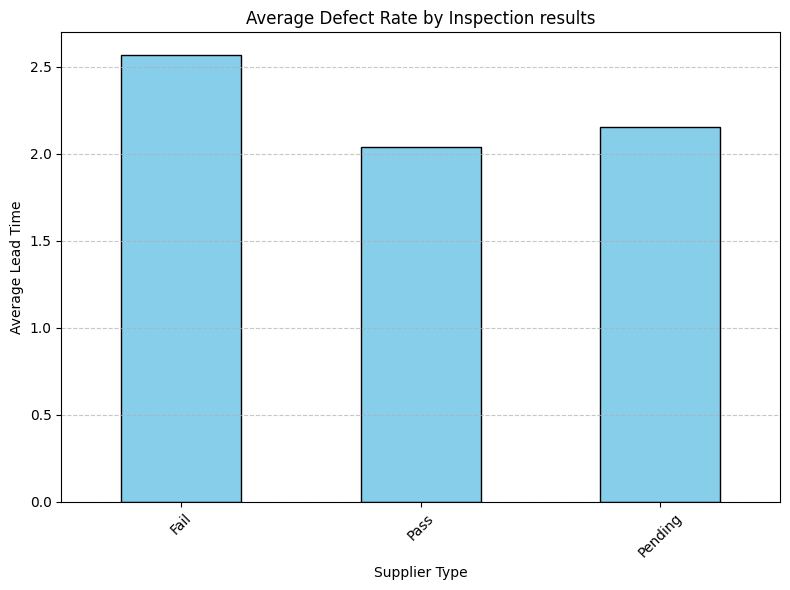

In [8]:
avg_lead_time = X.groupby('Inspection results')['Defect rates'].mean()

# Plotting
plt.figure(figsize=(8, 6))
avg_lead_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Defect Rate by Inspection results')
plt.xlabel('Supplier Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 2000x2000 with 0 Axes>

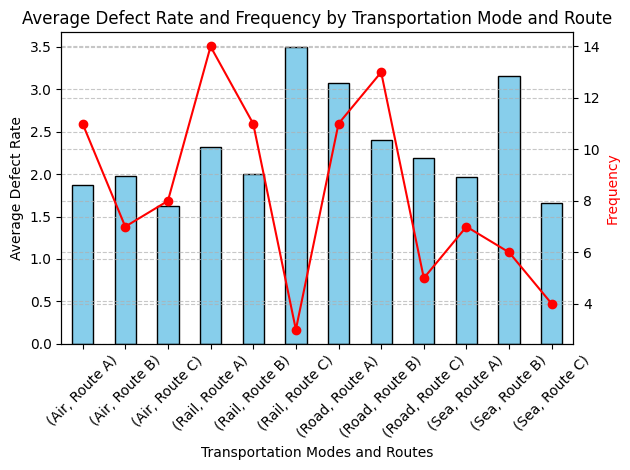

In [9]:
avg_defect_rate = X.groupby(['Transportation modes', 'Routes'])['Defect rates'].mean()
frequency = X.groupby(['Transportation modes', 'Routes']).size()

# Plotting average defect rate
plt.figure(figsize=(20,20))

# Create subplots: one for average defect rate and one for frequency
fig, ax1 = plt.subplots()

# Plotting the average defect rate
avg_defect_rate.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Average Defect Rate and Frequency by Transportation Mode and Route')
ax1.set_xlabel('Transportation Modes and Routes')
ax1.set_ylabel('Average Defect Rate')
ax1.tick_params(axis='x', rotation=45)

# Create a second axis to plot the frequency
ax2 = ax1.twinx()
frequency.plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Frequency', color='red')

# Show gridlines for the y-axis on both plots
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [10]:

    defect_rate = X['Defect rates']

    avg = defect_rate.mean()
    median = defect_rate.median()
    maximum = defect_rate.max()
    minimum = defect_rate.min()
    std_dev = defect_rate.std()

    print(f"Average Defect Rate: {avg}")
    print(f"Median Defect Rate: {median}")
    print(f"Max Defect Rate: {maximum}")
    print(f"Min Defect Rate: {minimum}")
    print(f"Standard Deviation of Defect Rate: {std_dev}")


Average Defect Rate: 2.27715799273961
Median Defect Rate: 2.1418626833498684
Max Defect Rate: 4.939255288620948
Min Defect Rate: 0.0186075676310149
Standard Deviation of Defect Rate: 1.46136554894314


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Drop categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
df_numeric = X.drop(columns=categorical_columns)


# Define features and target
X = df_numeric.drop(columns=['Defect rates'])
y = df_numeric['Defect rates']

# Split into training and testing set (just for robustness)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)



feature_importance_df.reset_index(drop=True)


,Feature,Importance
0,Supplier lead time,0.213478
1,Manufacturing lead time,0.121494
2,Price,0.097101
3,Number of products sold,0.074198
4,Production volumes,0.066282
5,Business lead time,0.059496
6,Transportation costs,0.057378
7,Shipping costs,0.056376
8,Stock levels,0.050610
9,Manufacturing costs,0.043974


In [12]:
y_pred= rf.predict(X_test)
print(y_pred.mean())


2.0362027755087464


In [13]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the top 10 most important features
top_10_features = feature_importances.head(10)
print("Top 10 features affecting Defect rate")
print(top_10_features)

Top 10 features affecting Defect rate
                    Feature  Importance
9        Supplier lead time    0.213478
11  Manufacturing lead time    0.121494
0                     Price    0.097101
2   Number of products sold    0.074198
10       Production volumes    0.066282
5        Business lead time    0.059496
13     Transportation costs    0.057378
8            Shipping costs    0.056376
4              Stock levels    0.050610
12      Manufacturing costs    0.043974


In [14]:
X_test_improved = X_test.copy()

# Modify key features in the test data
X_test_improved["Number of products sold"] = X_test['Number of products sold'] * 1.3
X_test_improved["Supplier lead time"] = X_test['Supplier lead time'] * 0.6
X_test_improved["Manufacturing lead time"] = X_test['Manufacturing lead time'] * 0.7


In [15]:



# Re-run predictions with improved data
y_pred_improved = rf.predict(X_test_improved)

# Compare original vs improved predictions
original_avg_score = np.mean(rf.predict(X_test))
improved_avg_score = np.mean(y_pred_improved)

print(f"Original average score: {original_avg_score:.2f}")
print(f"Improved average score after modifying key features: {improved_avg_score:.2f}")


if improved_avg_score <= 1.83:
    print("The changes reduced the average defect rates by percent or even below!")
else:
    print(f"The changes improved the score, but it is still needs improvent . Current average: {improved_avg_score:.2f}")


print("Standard devaition", np.std(y_pred_improved))



Original average score: 2.04
Improved average score after modifying key features: 1.77
The changes reduced the average defect rates by percent or even below!
Standard devaition 0.6740028101933145


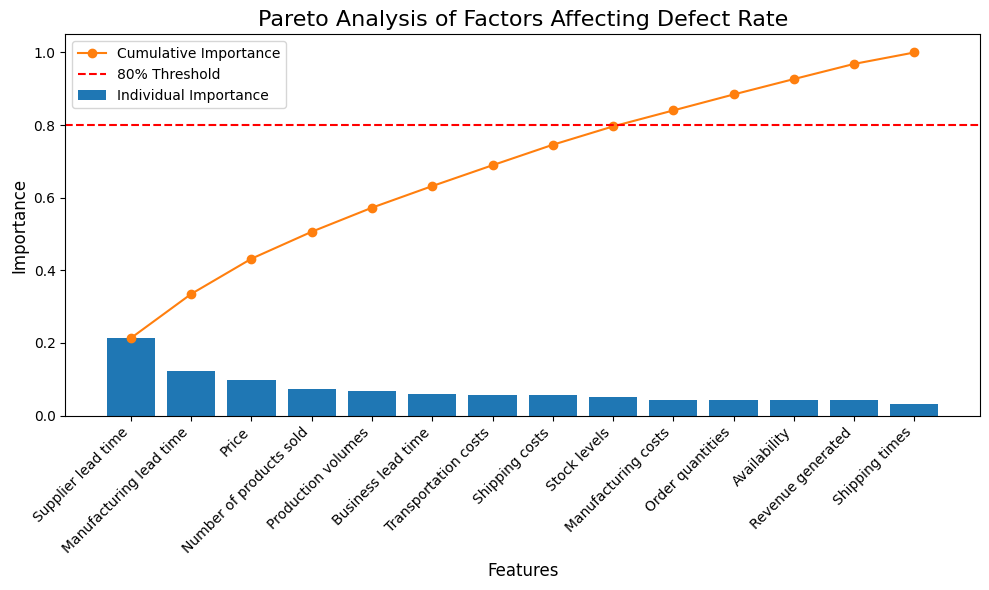

In [16]:
import matplotlib.pyplot as plt

# Calculate cumulative importance
feature_importances['Cumulative Importance'] = feature_importances['Importance'].cumsum()

# Create the Pareto diagram
plt.figure(figsize=(10, 6))

# Bar chart for feature importances
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='C0', label='Individual Importance')

# Line chart for cumulative importance
plt.plot(feature_importances['Feature'], feature_importances['Cumulative Importance'], color='C1', marker='o', label='Cumulative Importance')

# Add a horizontal line at 80% (Pareto threshold)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')

# Add titles and labels
plt.title('Pareto Analysis of Factors Affecting Defect Rate', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()
